## Igår: 
setup - repo, folderstruktur, installationer (numpy, pandas, seaborn, matplotlib, openpyxl, ipykernel) 
- Pandas och Seaborn
- Series object
- DataFrame object
- Index object
- Selections, filtering, masking, rename, sorting ...
- Summativa beskrivningar av data -> info(), describe(), unique(), head(), tail()
- Visualiserar mha Seaborn

---
# Lecture notes - Pandas - missing data & aggregations

---
This is the lecture note for **Pandas missing data & aggregations** - but it's built upon contents from previous course: 
- Python programming

Read more 

- [documentation - read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

- [documentation - aggregate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html)

- [documentation - groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

- [documentation - missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
---

## Setup
- create dummy DataFrame
- it's very useful to create dummy DataFrame in order to test and learn Pandas methods

In [2]:
import numpy as np 
import pandas as pd
np.random.seed(1337)

n = 8
random_matrix = np.random.randint(1,10, (n,n))
#It returns an array of specified shape and fills it with random integers from low (inclusive) to high (exclusive), i.e. in the interval [low, high).
print(random_matrix)

index = np.random.choice(random_matrix.size, 10, replace = False)
#random.choice(a, size=None, replace=True, p=None). Generates a random sample from a given 1-D array: a

print(f"index {index}")
print(f"Flattens the matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 # to convert it to float. As np.nan is float
random_matrix.ravel()[index] = None # returns contiguous flattened array
# numeric containers always use NaN 
print(random_matrix)

[[8 9 8 8 3 3 5 9]
 [7 7 8 9 2 7 7 3]
 [3 9 2 8 4 2 4 4]
 [5 9 9 8 5 2 7 5]
 [5 3 6 8 5 3 4 3]
 [5 9 7 4 9 9 8 5]
 [4 3 2 3 1 4 9 3]
 [2 1 2 5 3 1 1 8]]
index [28 42 17 49 53 31 35  2 13 62]
Flattens the matrix: [8 9 8 8 3 3 5 9 7 7 8 9 2 7 7 3 3 9 2 8 4 2 4 4 5 9 9 8 5 2 7 5 5 3 6 8 5
 3 4 3 5 9 7 4 9 9 8 5 4 3 2 3 1 4 9 3 2 1 2 5 3 1 1 8]
[[ 8.  9. nan  8.  3.  3.  5.  9.]
 [ 7.  7.  8.  9.  2. nan  7.  3.]
 [ 3. nan  2.  8.  4.  2.  4.  4.]
 [ 5.  9.  9.  8. nan  2.  7. nan]
 [ 5.  3.  6. nan  5.  3.  4.  3.]
 [ 5.  9. nan  4.  9.  9.  8.  5.]
 [ 4. nan  2.  3.  1. nan  9.  3.]
 [ 2.  1.  2.  5.  3.  1. nan  8.]]


In [3]:
scores = pd.DataFrame(random_matrix,
                      index=[f"Player {i}" for i in range(1, n+1)],
                      columns=[f"Round {i}" for i in range(1,n+1)]
                      )
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [5]:
scores.describe()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
count,8.00000,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000
mean,4.87500,6.333333,4.833333,6.428571,3.857143,3.333333,6.285714,5.000000
std,1.95941,3.502380,3.250641,2.370453,2.609506,2.875181,1.976047,2.516611
min,2.00000,1.000000,2.000000,3.000000,1.000000,1.000000,4.000000,3.000000
25%,3.75000,4.000000,2.000000,4.500000,2.500000,2.000000,4.500000,3.000000
50%,5.00000,8.000000,4.000000,8.000000,3.000000,2.500000,7.000000,4.000000
75%,5.50000,9.000000,7.500000,8.000000,4.500000,3.000000,7.500000,6.500000
max,8.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


## Missing data techniques
- None - Pythonic missing data. A Python object - operations done on Python level and not numpy or pandas.
    - Error when performing arithmetic on None dtypes
- NaN - floating point "Not a Number". Supports fast operations, however all arithmetic operations with NaN results in a NaN
- NA - pd.NA -> missing indicator that can be used consistently across data types

Pandas treats NaN and None almost interchangeably
- isnull() - returns true if value is null  
- notnull() - returns true if value is not null
- dropna() - drops the the whole axis with nulls 
- fillna() - fills the null values with certain value

In [6]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [7]:
scores.notnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,True,True,False,True,True,True,True,True
Player 2,True,True,True,True,True,False,True,True
Player 3,True,False,True,True,True,True,True,True
Player 4,True,True,True,True,False,True,True,False
Player 5,True,True,True,False,True,True,True,True
Player 6,True,True,False,True,True,True,True,True
Player 7,True,False,True,True,True,False,True,True
Player 8,True,True,True,True,True,True,False,True


In [8]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [9]:
scores.dropna(axis=1)  
#scores.dropna(axis="columns")  #only the column that no missing data left.

,Round 1
Player 1,8.0
Player 2,7.0
Player 3,3.0
Player 4,5.0
Player 5,5.0
Player 6,5.0
Player 7,4.0
Player 8,2.0


In [10]:
# how to treat NaNs? 
# depends on the situations
# many times need to talk to domain experts
scores.fillna(0) # in this case - may be reasonable to give 0 scores for missing value 

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,0.0,8.0


## Missing value strategy

Strategy depends on:
- dataset size
- valuable information (some rows, some columns)
- percentage missing values
- domain knowledge
- missing values can impact
    - data visualization
    - artihmetic computations
    - summary statistics
    - machine learning algorithms

In [11]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

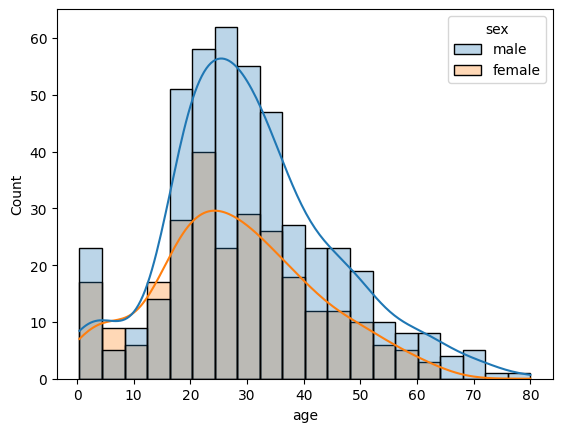

In [14]:
# focus on Age
sns.histplot(data=titanic, x="age", kde=True, hue="sex", alpha=.3); #kde:kernel distribution estimation

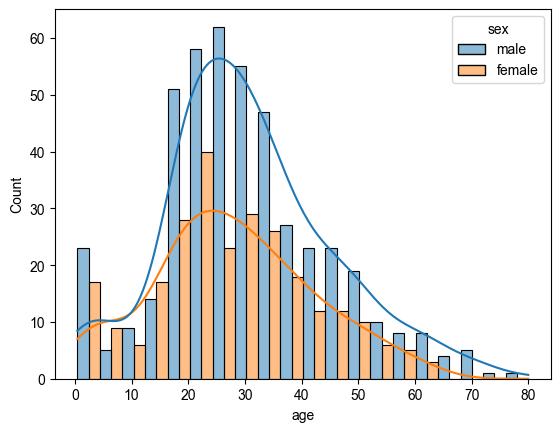

In [15]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex", multiple="dodge")
sns.set_theme()

In [32]:
# talked to a titanic historian (not a real historian)
# this dude says: use median age of corresponding gender to fill in ages

print(f"Number of males {np.sum(titanic['sex'] == 'male')}")
print(f"Number of females {np.sum(titanic['sex'] == 'female')}")

median_male_age = titanic.loc[titanic["sex"] == "male", "age"].median() # Gives the median
median_female_age = titanic.loc[titanic["sex"] == "female", "age"].median() # Gives the median

median_female_age, median_male_age

Number of males 577
Number of females 314


(27.0, 29.0)

In [33]:
titanic.loc[titanic["sex"]=="male", "age"] = titanic.loc[titanic["sex"]=="male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"]==29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [18]:
titanic.isnull().sum()["age"] # Nulls left to fill

53

In [22]:
titanic["age"].isnull().sum()

53

In [28]:
titanic.loc[titanic["sex"]=="female", "age"] = titanic.loc[titanic["sex"]=="female", "age"].fillna(median_female_age)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [24]:
titanic.isnull().sum().age

0

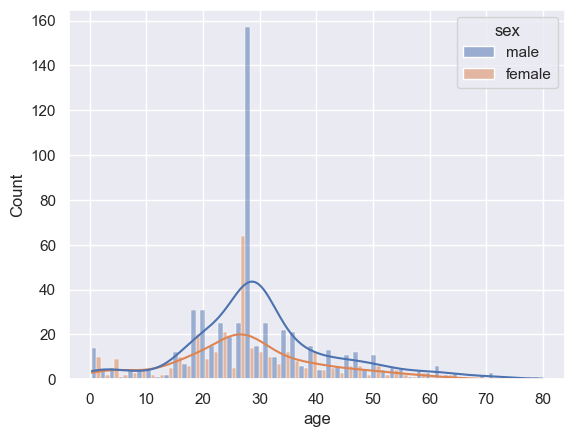

In [26]:
sns.histplot(data=titanic, x="age", kde=True, multiple="dodge", hue="sex", bins=50);